In [7]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [8]:
k=0.4
m=0.1
w=np.sqrt(k/m)

In [9]:
def f(t,X):   #X=[x,v,a]
    return [X[1],X[2],-k/m*X[1]]

In [10]:
ans=sp.integrate.solve_ivp(f,(0,20),[0.1,0,-k*0.1/m],dense_output=True)

In [36]:
t=np.linspace(0,20,5000)

In [37]:
y=ans.sol(t)

In [38]:
y.shape

(3, 5000)

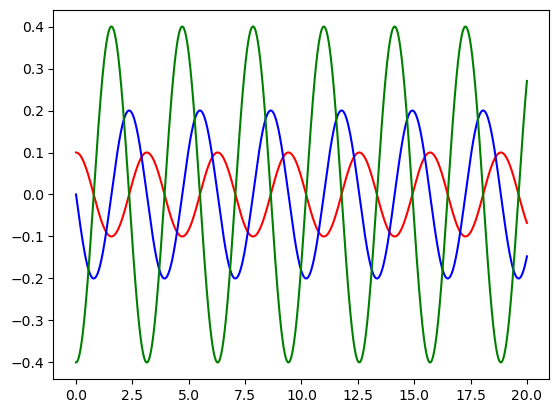

In [39]:
plt.plot(t,y[0],'r-')
plt.plot(t,y[1],'b-')
plt.plot(t,y[2],'g-')

In [40]:
u=0.002
g=9.8

In [41]:
def f2(t,X):    # X=[x,v]
    return [X[1],-k/m*X[0]+ (u*m*g/m)*(-1 if X[1]>1e-6 else 1)]

In [42]:
ans2=sp.integrate.solve_ivp(f2,(0,20),[0.1,0],dense_output=True)

In [43]:
y=ans2.sol(t)

In [44]:
y.shape

(2, 5000)

In [63]:
dt=t[1]-t[0]
a=(y[1,1:]-y[1,:-1])/dt
a.shape

(4999,)

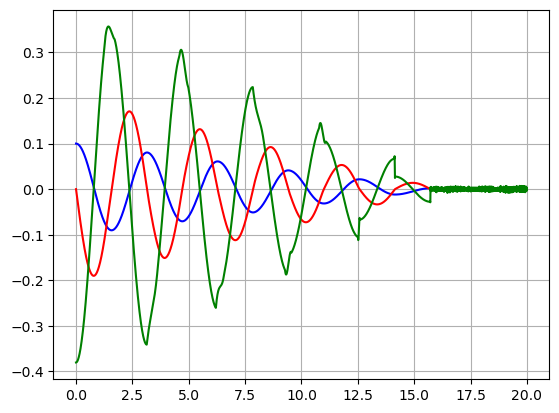

In [65]:
plt.plot(t,y[0],'b-')
plt.plot(t,y[1],'r-')
plt.plot(t[:-1],a,'g-')
plt.grid()

In [68]:
sm=sp.interpolate.make_smoothing_spline(t,y[1])

In [71]:
smD=sm.derivative()

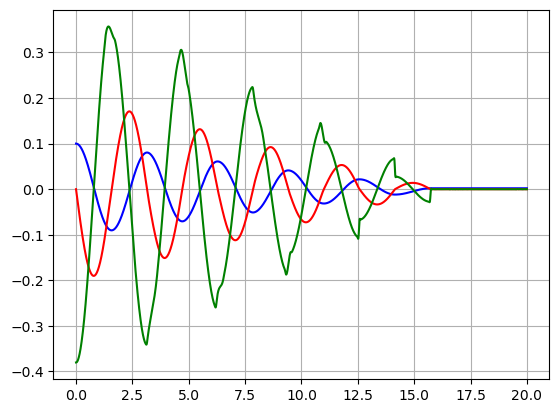

In [72]:
plt.plot(t,y[0],'b-')
plt.plot(t,y[1],'r-')
plt.plot(t,smD(t),'g-')
plt.grid()

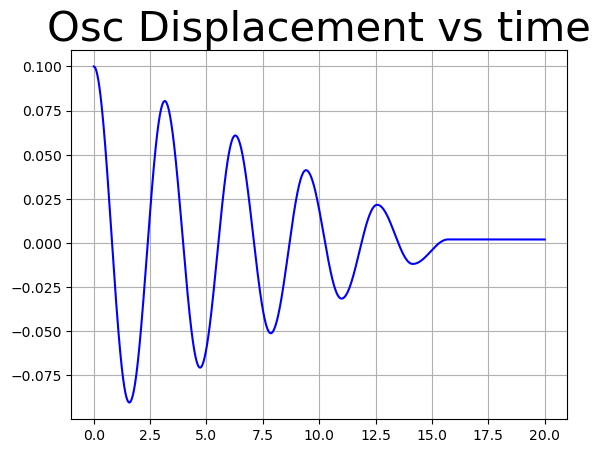

In [76]:

plt.plot(t,y[0],'b-')
plt.title('Osc Displacement vs time',fontsize=30)
plt.grid()

Text(0.5, 1.0, 'Osc Velocity vs time')

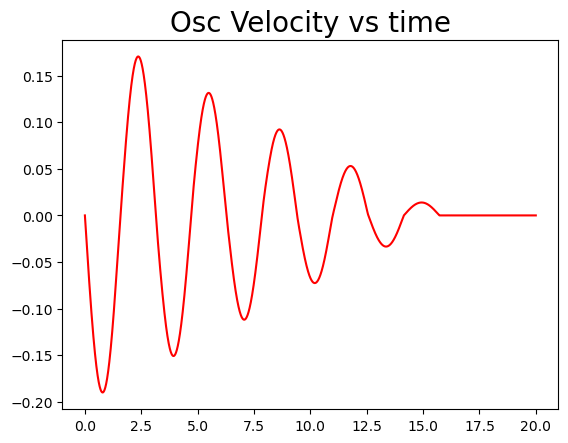

In [77]:

plt.plot(t,y[1],'r-')
plt.title('Osc Velocity vs time',fontsize=20)
#plt.grid()

Text(0.5, 1.0, 'Osc Acceleration vs time')

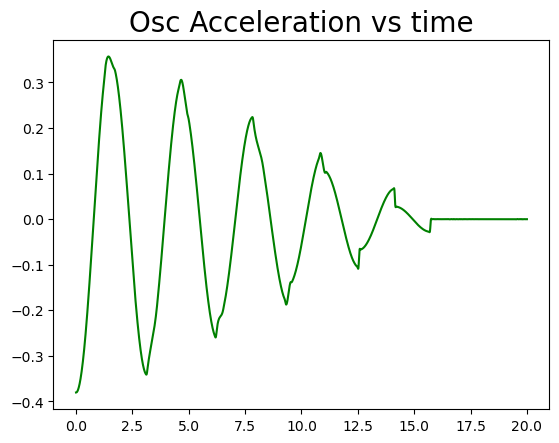

In [78]:

plt.plot(t,smD(t),'g-')
plt.title('Osc Acceleration vs time',fontsize=20)
#plt.grid()